# Graph Gamma-Jet Efficiencies of EMCal and DCal

In [12]:
import ROOT
from ROOT import TH1, TH2, TCanvas, TLatex, TLegend, TH2D

In [7]:
# Get Files
EMCalfile = ROOT.TFile("fout_efficiency_18b10a_calo_pthat1to4.root", "READ")
DCalfile = ROOT.TFile("fout_efficiency_18b10b_calo_pthat1to4_v1.root", "READ")

In [8]:
# Get Data
EMCalEff = EMCalfile.Get("ratio_photons")
DCalEff = DCalfile.Get("ratio_photons")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file EMCal_DCal_Efficiencies.png has been created


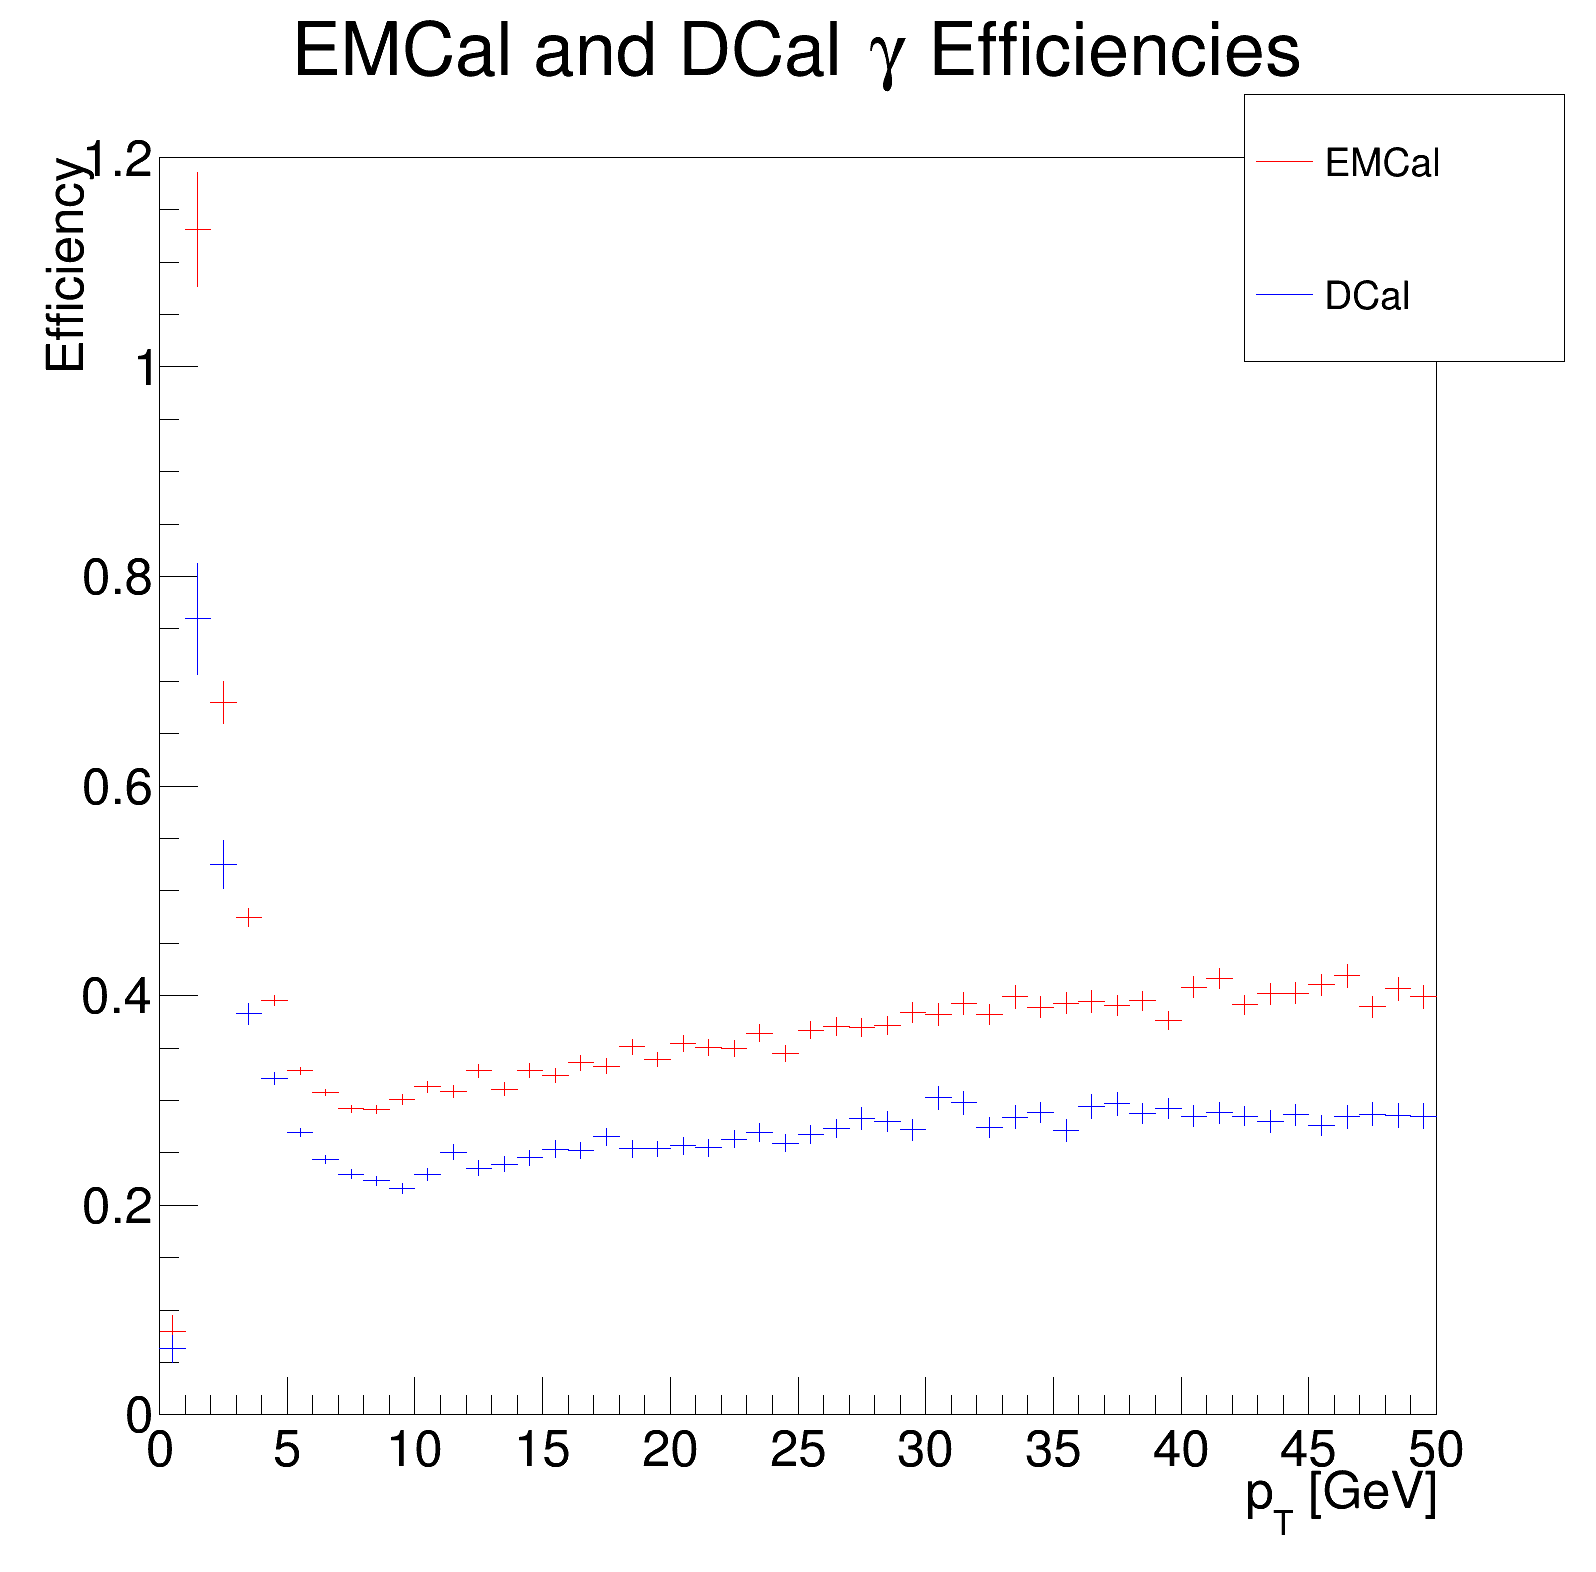

In [9]:
# Set up plotting and draw the graph
EMCalEff.SetTitle("EMCal and DCal #gamma Efficiencies; p_{T} [GeV]; Efficiency")
EMCalEff.SetMaximum(1.2)
EMCalEff.SetMinimum(0.0)
EMCalEff.SetMarkerColor(2)
EMCalEff.SetLineColor(2)
DCalEff.SetMinimum(0.0)
DCalEff.SetMarkerColor(4)
DCalEff.SetLineColor(4)

c = TCanvas("c", "c", 1600, 1600)
EMCalEff.Draw()
DCalEff.Draw("same")
c.Draw()

# Legend
legend = TLegend(0.78, 0.77, 0.98, .94)
legend.AddEntry(EMCalEff, "#scale[0.7]{EMCal}", "l")
legend.AddEntry(DCalEff, "#scale[0.7]{DCal}", "l")
legend.Draw()
c.SaveAs("EMCal_DCal_Efficiencies.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file EMCal_phieta_Efficiencies.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Info in <TCanvas::Print>: png file DCal_phieta_Efficiencies.png has been created


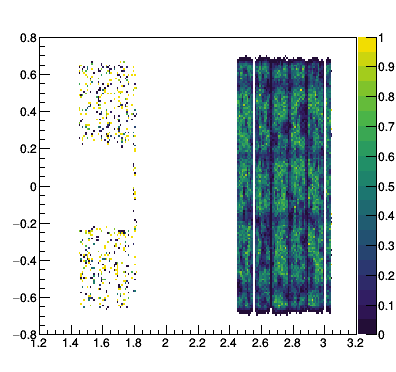

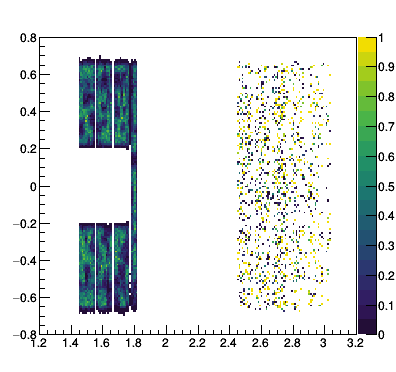

In [10]:
ROOT.gStyle.SetPalette(ROOT.kViridis);
ROOT.gStyle.SetOptStat('')
# Plot the phi-eta maps together
EMCalphietaEff = EMCalfile.Get("phi_eta_map_ratio")
DCalphietaEff = DCalfile.Get("phi_eta_map_ratio")
EMCalphietaEff.SetMaximum(1.0)
EMCalphietaEff.SetMinimum(0.0)
DCalphietaEff.SetMaximum(1.0)
DCalphietaEff.SetMinimum(0.0)

c1 = TCanvas("c1", "c1", 400, 400)
EMCalphietaEff.Draw("COLZ")
c1.Draw()
c1.SaveAs("EMCal_phieta_Efficiencies.png")

c2 = TCanvas("c2", "c2", 400, 400)
DCalphietaEff.Draw("COLZ")
c2.Draw()
c2.SaveAs("DCal_phieta_Efficiencies.png")


In [18]:
# Function for overwriting a certain portion of a graph with the contents of another graph
# Precondition: the destination and source graphs must have the same parameters, must have the specified ranges of both parameters within the graph, and have the same resolution
def overwriteGraph2D(destination, source, xmin, xmax, ymin, ymax):
    # Translate bounds over which the copying is to take place from parameter values to bin numbers
    x_bin_min = destination.GetXaxis().FindBin(xmin);
    x_bin_max = destination.GetXaxis().FindBin(xmax);
    y_bin_min = destination.GetYaxis().FindBin(ymin);
    y_bin_max = destination.GetYaxis().FindBin(ymax);
    
    # Loop over all cells within the proper range, transfer values from source to destination
    x_bin = x_bin_min
    while(x_bin <= x_bin_max):
        y_bin = y_bin_min
        while(y_bin <= y_bin_max):
            destination.SetBinContent(x_bin, y_bin, source.GetBinContent(x_bin, y_bin))
            destination.SetBinError(x_bin, y_bin, source.GetBinError(x_bin, y_bin))
            y_bin += 1
        x_bin += 1
    return

Warning in <TFile::Append>: Replacing existing TH1: DCal_EMCal_Phi_Eta_Efficiencies (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3
Info in <TCanvas::Print>: png file DCal_and_EMCal_Efficiencies.png has been created


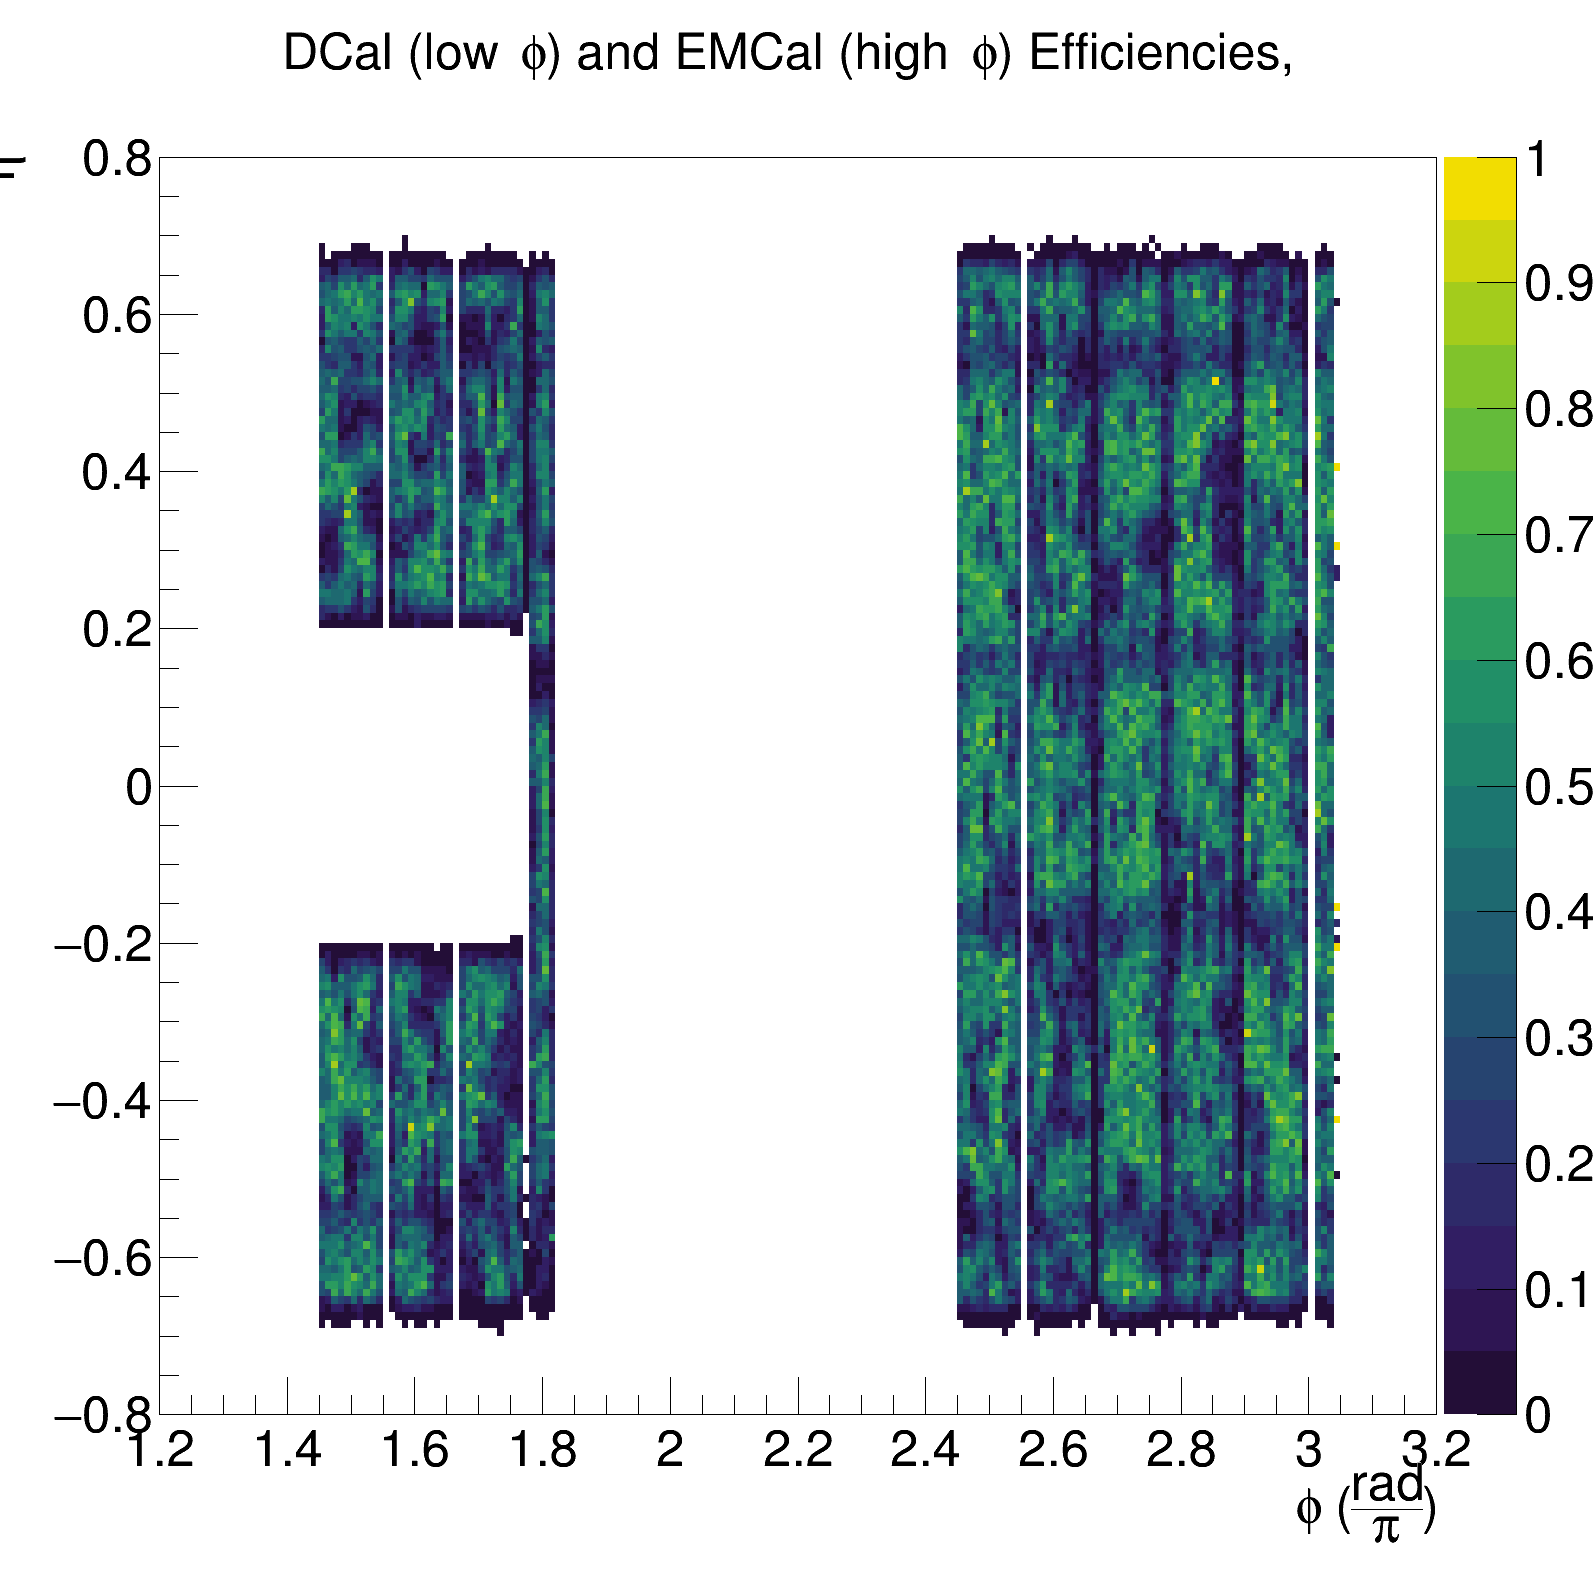

In [21]:


# Graph the EMCal and DCal efficiencies on one graph
# First, fill a graph with the EMCal and DCal cells
combinedEfficiencies = TH2D("DCal_EMCal_Phi_Eta_Efficiencies", "DCal (low #phi) and EMCal (high #phi) Efficiencies, ; #phi (#frac{rad}{#pi}); #eta", 200, 1.2, 3.2, 160, -0.8, 0.8)
overwriteGraph2D(combinedEfficiencies, DCalphietaEff, 1.4, 2, -0.8, 0.8)
overwriteGraph2D(combinedEfficiencies, EMCalphietaEff, 2.4, 3.1, -0.8, 0.8)
combinedEfficiencies.SetMaximum(1.0)
combinedEfficiencies.SetMinimum(0.0)

c3 = TCanvas("c3", "c3", 1600, 1600)
combinedEfficiencies.Draw("COLZ")
c3.Draw()
c3.SaveAs("DCal_and_EMCal_Efficiencies.png")